# Final Project
## Date: 06/18/2021
## Team: Bryce Randolph, Jeannie Davis, Harsandeep Singh, Kevin Robell


## Plotly and Cufflinks Installation

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).
In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

plotly may be installed using pip OR conda:

    pip install plotly==4.14.3

    conda install -c plotly plotly=4.14.3
    
Cufflinks may be installed using pip:

    pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

In [532]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
sns.set()
rcParams['figure.figsize'] = 8,6
sns.set_context('talk')   # 'talk' for slightly larger

In [533]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print('Plotly Version:',__version__) # requires version >= 1.9.0

import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

Plotly Version: 4.14.3


## What we are going to predict
We want to predict the winner of an NBA game based on the game stats from the 2019 season which is in the HOME_TEAM_WINS column.


## Choice of Dataset
Our dataset is focused on the 2019 season from this dataset of NBA games(games.csv). https://www.kaggle.com/nathanlauga/nba-games. We are choosing to make the program modular enough that other seasons can also be analyzed, but only a single season is chosen at a time to stay within the goals of the project. Drop the games.csv in the same folder as this file to run the following code.

## Predictors
To predict the winner of each game we will use all of the game stats except for the PTS_away and PTS_home columns. In addition, two predictors have been added, the REB_PCT_away and REB_PCT_home columns, based upon the REB_away and REB_home columns as seen below.

#### List of Predictors 
 8   FG_PCT_home       1241 non-null   float64   
 9   FT_PCT_home       1241 non-null   float64   
 10  FG3_PCT_home      1241 non-null   float64   
 11  AST_home          1241 non-null   float64   
 12  REB_home          1241 non-null   float64   
 15  FG_PCT_away       1241 non-null   float64   
 16  FT_PCT_away       1241 non-null   float64   
 17  FG3_PCT_away      1241 non-null   float64   
 18  AST_away          1241 non-null   float64   
 19  REB_away          1241 non-null   float64   
 21  REB_PCT_away      1241 non-null   float64   
 22  REB_PCT_home      1241 non-null   float64   

## Reading the Data

In [534]:
df = pd.read_csv("https://raw.githubusercontent.com/harsandeep1/cst383-final-project/main/games.csv")
df = df[df.SEASON == 2019]

## Initial Exploration 

In [535]:
df

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17673,2019-10-05,11900005,Final,1610612754,1610612758,2019,1610612754,130.0,0.521,0.944,...,35.0,51.0,1610612758,106.0,0.378,0.780,0.353,24.0,35.0,1
17674,2019-10-05,11900006,Final,1610612744,1610612747,2019,1610612744,101.0,0.393,0.769,...,20.0,47.0,1610612747,123.0,0.475,0.633,0.303,32.0,58.0,0
17675,2019-10-05,11900007,Final,1610612759,1610612753,2019,1610612759,89.0,0.388,0.750,...,22.0,40.0,1610612753,125.0,0.526,0.714,0.361,29.0,47.0,0
17676,2019-10-04,11900002,Final,1610612746,1610612745,2019,1610612746,96.0,0.384,0.600,...,26.0,49.0,1610612745,109.0,0.375,0.800,0.229,21.0,52.0,0


<AxesSubplot:>

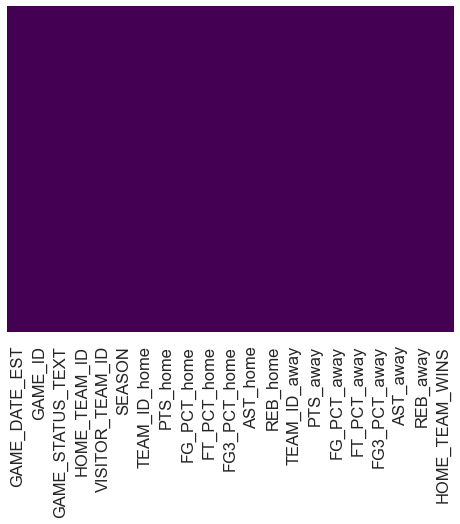

In [536]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #Since there are no data missing, the graph area is clear.

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     1241 non-null   object 
 1   GAME_ID           1241 non-null   int64  
 2   GAME_STATUS_TEXT  1241 non-null   object 
 3   HOME_TEAM_ID      1241 non-null   int64  
 4   VISITOR_TEAM_ID   1241 non-null   int64  
 5   SEASON            1241 non-null   int64  
 6   TEAM_ID_home      1241 non-null   int64  
 7   PTS_home          1241 non-null   float64
 8   FG_PCT_home       1241 non-null   float64
 9   FT_PCT_home       1241 non-null   float64
 10  FG3_PCT_home      1241 non-null   float64
 11  AST_home          1241 non-null   float64
 12  REB_home          1241 non-null   float64
 13  TEAM_ID_away      1241 non-null   int64  
 14  PTS_away          1241 non-null   float64
 15  FG_PCT_away       1241 non-null   float64
 16  FT_PCT_away       1241 non-null   floa

In [538]:
df.describe()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,1.241000e+03,1.241000e+03,1.241000e+03,1241.0,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1.241000e+03,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,2.247261e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.274778,0.463043,0.769757,0.359782,24.710717,45.438356,1.610613e+09,110.466559,0.455907,0.771137,0.353089,23.791297,44.197421,0.536664
std,5.922460e+06,8.505847e+00,8.505253e+00,0.0,8.505847e+00,12.781012,0.056152,0.098386,0.085668,4.850270,6.845032,8.505253e+00,12.447984,0.054403,0.102825,0.084250,4.851417,6.680293,0.498855
min,1.190000e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,68.000000,0.269000,0.400000,0.118000,11.000000,24.000000,1.610613e+09,70.000000,0.308000,0.375000,0.094000,10.000000,25.000000,0.000000
25%,2.190021e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,104.000000,0.425000,0.706000,0.300000,21.000000,41.000000,1.610613e+09,102.000000,0.418000,0.706000,0.297000,20.000000,40.000000,0.000000
50%,2.190052e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,112.000000,0.462000,0.778000,0.359000,25.000000,45.000000,1.610613e+09,110.000000,0.455000,0.774000,0.353000,24.000000,44.000000,1.000000
75%,2.190083e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,120.000000,0.505000,0.838000,0.417000,28.000000,50.000000,1.610613e+09,119.000000,0.494000,0.840000,0.406000,27.000000,48.000000,1.000000
max,5.190011e+07,1.610613e+09,1.610613e+09,2019.0,1.610613e+09,158.000000,0.633000,1.000000,0.629000,43.000000,67.000000,1.610613e+09,159.000000,0.674000,1.000000,0.680000,40.000000,65.000000,1.000000


In [539]:
df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,25.0,41.0,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,21.0,41.0,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,18.0,39.0,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,25.0,37.0,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,32.0,44.0,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1


## Initial preprocessing and cleaning

The dataset doesn't have any na values so it's unnecessary to drop columns for that reason. All games are final which means we don't need to drop partially completed games. At the same time, the columns GAME_DATE_EST, GAME_ID, GAME_STATUS_TEXT, HOME_TEAM_ID, VISITOR_TEAM_ID, SEASON, TEAM_ID_home, PTS_home, TEAM_ID_away, and PTS_away aren't used so they will all be dropped.

In [540]:
df.isna().sum() # This also Shows that data doesn't have NA values.

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

In [541]:
col_to_drop = ['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'TEAM_ID_away']
df.drop(col_to_drop, axis = 1, inplace=True)  #Dropping the useless/not relevant columns. 

## Exploration and Visualization
We took a look at the data to see which predictors correlated well with the outcome of the game and created some graphs to look at how certain predictors factored into who ended up winning.

In [542]:
df.info() # Basic data exploration

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 1206 to 17677
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GAME_ID         1241 non-null   int64  
 1   PTS_home        1241 non-null   float64
 2   FG_PCT_home     1241 non-null   float64
 3   FT_PCT_home     1241 non-null   float64
 4   FG3_PCT_home    1241 non-null   float64
 5   AST_home        1241 non-null   float64
 6   REB_home        1241 non-null   float64
 7   PTS_away        1241 non-null   float64
 8   FG_PCT_away     1241 non-null   float64
 9   FT_PCT_away     1241 non-null   float64
 10  FG3_PCT_away    1241 non-null   float64
 11  AST_away        1241 non-null   float64
 12  REB_away        1241 non-null   float64
 13  HOME_TEAM_WINS  1241 non-null   int64  
dtypes: float64(12), int64(2)
memory usage: 145.4 KB


In [543]:
df.head()

,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,41900406,93.0,0.443,0.591,0.357,25.0,41.0,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,41900405,108.0,0.463,0.857,0.368,21.0,41.0,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,41900404,96.0,0.427,0.808,0.344,18.0,39.0,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,41900403,115.0,0.513,0.913,0.353,25.0,37.0,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,41900402,124.0,0.505,0.588,0.340,32.0,44.0,114.0,0.507,0.912,0.407,29.0,37.0,1


##### Here is the graphing section. Different graphs such as histograms, barplots, scatterplots,violin/bar plots, and three variable plots are presented in this section.

##### Histogram plots

In [544]:
#sns.pairplot(df) This might take some time to load based upon the size of a dataset. Comment out for now.

In [545]:
df['REB_PCT_away'] = df['REB_away'] / (df['REB_away'] + df['REB_home'])
df['REB_PCT_home'] = df['REB_home'] / (df['REB_away'] + df['REB_home'])

In [546]:
df.head()

,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,REB_PCT_away,REB_PCT_home
1206,41900406,93.0,0.443,0.591,0.357,25.0,41.0,106.0,0.483,0.643,0.314,23.0,46.0,0,0.528736,0.471264
1207,41900405,108.0,0.463,0.857,0.368,21.0,41.0,111.0,0.458,0.955,0.424,26.0,35.0,0,0.460526,0.539474
1208,41900404,96.0,0.427,0.808,0.344,18.0,39.0,102.0,0.443,0.857,0.359,25.0,42.0,0,0.518519,0.481481
1209,41900403,115.0,0.513,0.913,0.353,25.0,37.0,104.0,0.430,0.759,0.333,23.0,43.0,1,0.537500,0.462500
1210,41900402,124.0,0.505,0.588,0.340,32.0,44.0,114.0,0.507,0.912,0.407,29.0,37.0,1,0.456790,0.543210


In [547]:
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]

In [548]:
df['REB_PCT_away'].iplot(kind='hist',bins=120, title='REB_PCT_away')

In [549]:
df['REB_PCT_home'].iplot(kind='hist',bins=120,colors='blue',title='REB_PCT_home')

##### Bar plot

In [550]:
df.iplot(kind='bar',x='HOME_TEAM_WINS',y='GAME_ID',colors='red',xTitle='HOME_TEAM_WINS',yTitle='GAME_ID')

In [551]:
#sns.displot(df['HOME_TEAM_WINS'], bins=30, kde=True)

##### Scatter plots 

In [552]:
df.iplot(kind='scatter',x='FT_PCT_home',y='FG_PCT_home',mode='markers',size=5, xTitle='FT_PCT_home',yTitle='FG_PCT_home')

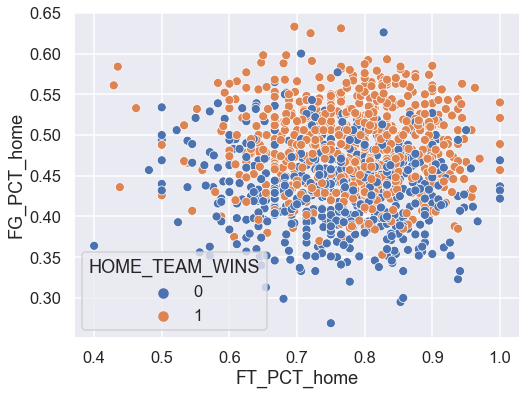

In [553]:
sns.scatterplot(x="FT_PCT_home", y="FG_PCT_home", hue='HOME_TEAM_WINS', data=df);

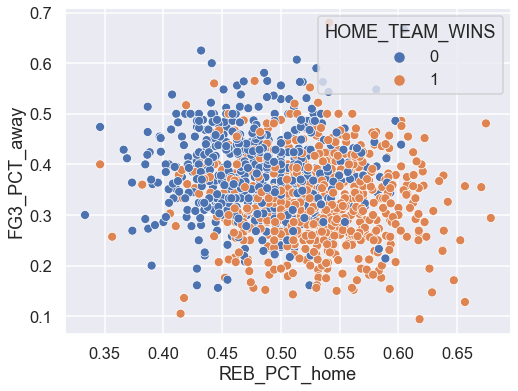

In [554]:
sns.scatterplot(x="REB_PCT_home", y="FG3_PCT_away", hue='HOME_TEAM_WINS', data=df);

##### Violin/Box plots

<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='PTS_home'>

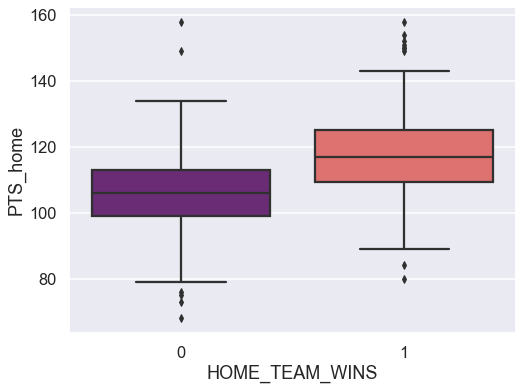

In [555]:
sns.boxplot(x='HOME_TEAM_WINS', y='PTS_home',data=df,palette='magma')

<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='PTS_away'>

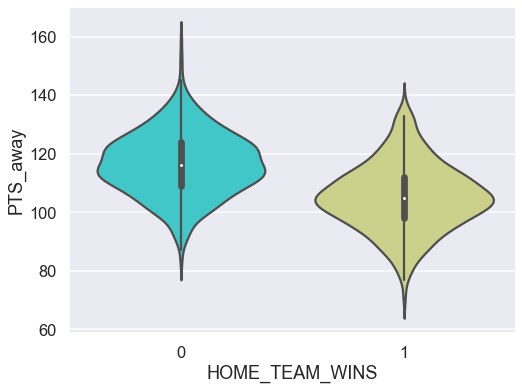

In [556]:
sns.violinplot(x='HOME_TEAM_WINS', y='PTS_away',data=df,palette='rainbow')

##### Heatmap plot

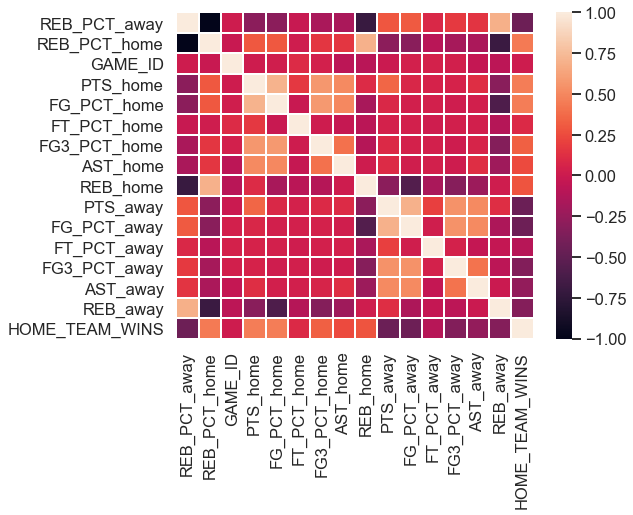

In [557]:
sns.heatmap(df.corr(),linecolor='white',linewidths=1);

## Prelimary Machine Learning

#### Training a Linear Regression Model 

##### X and y arrays

In [558]:
df.columns

Index(['REB_PCT_away', 'REB_PCT_home', 'GAME_ID', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away',
       'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
       'HOME_TEAM_WINS'],
      dtype='object')

In [559]:
X = df[['GAME_ID', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home',
       'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away']]
y = df['HOME_TEAM_WINS']

##### Train Test Split

In [560]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

##### Creating and Training the Model

In [561]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

##### Model Evaluation

In [562]:
# print the intercept
print(lm.intercept_)

1.0869446959121367


In [563]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GAME_ID,7.661325e-10
PTS_home,2.773398e-02
FG_PCT_home,6.323058e-02
FT_PCT_home,-3.524423e-02
FG3_PCT_home,-1.358609e-01
AST_home,-4.763620e-03
REB_home,-1.590409e-03
PTS_away,-2.632417e-02
FG_PCT_away,-6.111478e-01
FT_PCT_away,-8.085203e-02


##### Predictions from our Model

In [564]:
predictions = lm.predict(X_test)

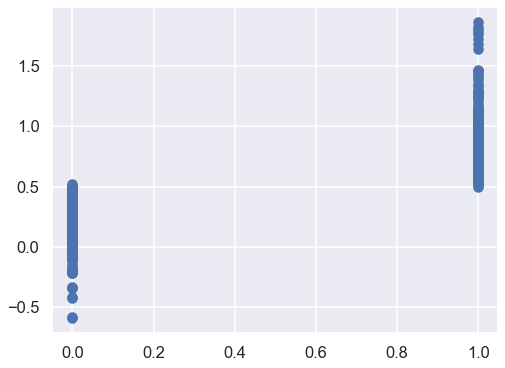

In [565]:
plt.scatter(y_test,predictions)

##### Residual Histogram

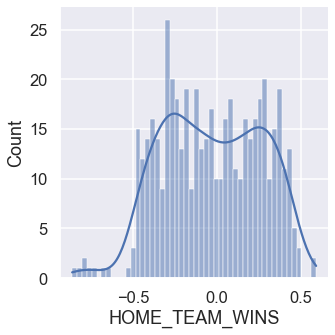

In [566]:
sns.displot((y_test-predictions),bins=50, kde=True)

In [567]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2515647379381724
MSE: 0.08566028545604011
RMSE: 0.2926777843568591


#### KNN - Standardize the Variables

In [568]:
df.head()

,REB_PCT_away,REB_PCT_home,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
1206,0.528736,0.471264,41900406,93.0,0.443,0.591,0.357,25.0,41.0,106.0,0.483,0.643,0.314,23.0,46.0,0
1207,0.460526,0.539474,41900405,108.0,0.463,0.857,0.368,21.0,41.0,111.0,0.458,0.955,0.424,26.0,35.0,0
1208,0.518519,0.481481,41900404,96.0,0.427,0.808,0.344,18.0,39.0,102.0,0.443,0.857,0.359,25.0,42.0,0
1209,0.537500,0.462500,41900403,115.0,0.513,0.913,0.353,25.0,37.0,104.0,0.430,0.759,0.333,23.0,43.0,1
1210,0.456790,0.543210,41900402,124.0,0.505,0.588,0.340,32.0,44.0,114.0,0.507,0.912,0.407,29.0,37.0,1


In [569]:
scaler = StandardScaler()
scaler.fit(df.drop('HOME_TEAM_WINS',axis=1))

StandardScaler()

In [570]:
scaled_features = scaler.transform(df.drop('HOME_TEAM_WINS',axis=1))
scaled_features

array([[ 0.66755841, -0.66755841,  3.28168194, ..., -0.46415809,
        -0.16317219,  0.26994403],
       [-0.61339141,  0.61339141,  3.28168178, ...,  0.84201014,
         0.45545314, -1.37735413],
       [ 0.47568418, -0.47568418,  3.28168161, ...,  0.07018346,
         0.24924469, -0.32907348],
       ...,
       [ 0.88341692, -0.88341692, -1.78589053, ...,  0.09393197,
         1.07407847,  0.41969841],
       [ 0.40681843, -0.40681843, -1.78589138, ..., -1.47346991,
        -0.57558908,  1.16847031],
       [ 2.20099482, -2.20099482, -1.78589121, ...,  0.20080028,
         0.45545314,  0.41969841]])

In [571]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,REB_PCT_away,REB_PCT_home,GAME_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.667558,-0.667558,3.281682,-1.508687,-0.357081,-1.817627,-0.032483,0.059667,-0.648667,-0.358963,0.498215,-1.246667,-0.464158,-0.163172,0.269944
1,-0.613391,0.613391,3.281682,-0.334598,-0.000761,0.887105,0.095971,-0.765362,-0.648667,0.042871,0.038496,1.788835,0.842010,0.455453,-1.377354
2,0.475684,-0.475684,3.281682,-1.273869,-0.642136,0.388865,-0.184292,-1.384134,-0.940967,-0.680429,-0.237335,0.835376,0.070183,0.249245,-0.329073
3,0.832151,-0.832151,3.281681,0.213310,0.890039,1.456522,-0.079193,0.059667,-1.233268,-0.519696,-0.476389,-0.118083,-0.238547,-0.163172,-0.179319
4,-0.683556,0.683556,3.281681,0.917764,0.747511,-1.848132,-0.231003,1.503467,-0.210216,0.283971,0.939546,1.370481,0.640148,1.074078,-1.077845


#### Train Test Split


In [572]:
X = df_feat
y = df['HOME_TEAM_WINS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### Using KNN


In [573]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#### Predictions and Evaluations
 

In [574]:
print(confusion_matrix(y_test,pred))

[[181  55]
 [ 43 218]]


In [575]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       236
           1       0.80      0.84      0.82       261

    accuracy                           0.80       497
   macro avg       0.80      0.80      0.80       497
weighted avg       0.80      0.80      0.80       497



#### Choosing a K Value


In [576]:
error_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

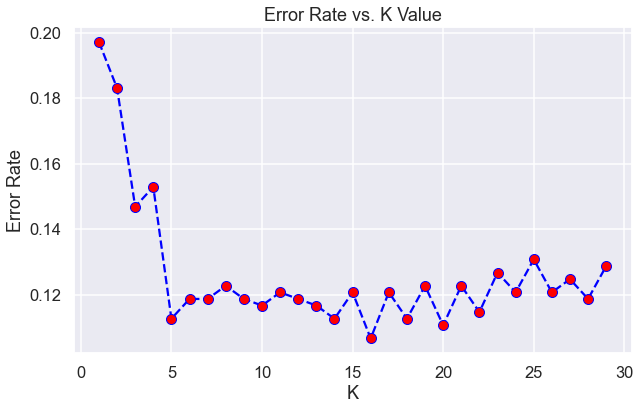

In [577]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [578]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[181  55]
 [ 43 218]]


              precision    recall  f1-score   support

           0       0.81      0.77      0.79       236
           1       0.80      0.84      0.82       261

    accuracy                           0.80       497
   macro avg       0.80      0.80      0.80       497
weighted avg       0.80      0.80      0.80       497



In [579]:
# NOW WITH K=16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=16')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=16


[[207  29]
 [ 24 237]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       236
           1       0.89      0.91      0.90       261

    accuracy                           0.89       497
   macro avg       0.89      0.89      0.89       497
weighted avg       0.89      0.89      0.89       497

